In [ ]:
# Load data
df_hosp, df_mort, df_cases, df_vacc = sciensano.get_sciensano_COVID19_data(update=False)
df_hosp = df_hosp['H_in'] 

In [20]:
span = 14

# Filter data
for NIS in df_hosp.index.get_level_values('NIS').unique():
        df_hosp.loc[slice(None), NIS] = df_hosp.loc[slice(None), NIS].ewm(span=span).mean().values
df_hosp.dropna(inplace=True) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


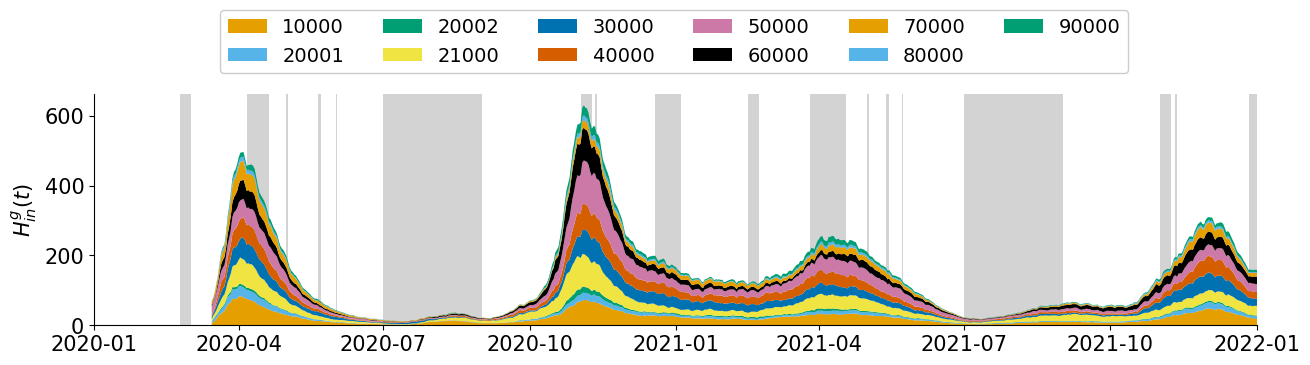

In [21]:
from covid19_DTM.visualization.output import *
from covid19_DTM.data import sciensano

# Start date
start_date = '2020-01-01'
end_date = '2022-01-01'

y=[]
l=[]
for NIS in df_hosp.index.get_level_values('NIS').unique():
    y.append(df_hosp.loc[slice(None), NIS].values)
    l.append(str(NIS))

fig,ax=plt.subplots(figsize=(15,3))
ax.stackplot(df_hosp.index.get_level_values('date').unique(), *y)
week_color='white'#'white'
weekend_color='white'#'lightgrey'
vacation_color='lightgrey'#weekend_color
color_timeframes(start_date, end_date, ax=ax, week_color=week_color, weekend_color=weekend_color, vacation_color=vacation_color)
ax.grid(False)
ax.legend()

handles, labels = ax.get_legend_handles_labels()
ax.legend(l, fontsize=14, framealpha=1, ncol=6, bbox_to_anchor=(0.1, 1.05))
ax.set_ylabel("$H^g_{in}(t)$")
ax.set_xlabel(None)
ax.set_xlim([pd.Timestamp(start_date),pd.Timestamp(end_date)])

plt.savefig('all-H_in-series_prov.pdf', bbox_inches='tight')